In [1]:
import matplotlib.pylab as plt
import numpy as np
import cv2
import os
import json
import pathlib
from pycocotools.coco import COCO

In [33]:
images = list(pathlib.Path("/data/food_recognition/train/images/").glob("*.jpg"))
len(images)

54392

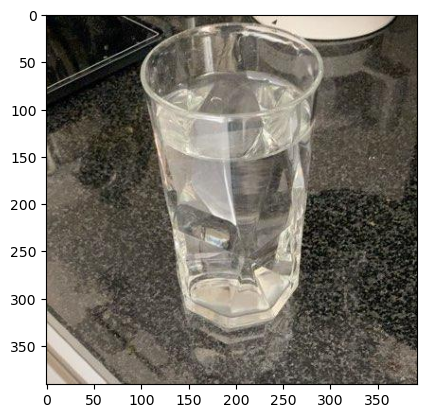

In [8]:
image = plt.imread(images[0])
plt.imshow(image)
plt.show()

In [2]:
with open("/data/food_recognition/train/annotations.json", "r") as f:
    annots = json.load(f)

In [3]:
annots.keys()

dict_keys(['categories', 'info', 'images', 'annotations'])

In [4]:
annots["annotations"][0]

{'id': 184123,
 'image_id': 131072,
 'category_id': 101246,
 'segmentation': [[169.0,
   379.5,
   130.0,
   374.5,
   112.0,
   363.5,
   94.5,
   340.0,
   61.5,
   213.0,
   61.5,
   188.0,
   70.5,
   168.0,
   87.0,
   152.5,
   103.0,
   143.5,
   123.0,
   139.5,
   185.0,
   118.5,
   226.0,
   90.5,
   249.0,
   87.5,
   309.0,
   88.5,
   339.0,
   110.5,
   350.5,
   125.00000000000001,
   354.5,
   155.0,
   382.5,
   231.0,
   383.5,
   277.0,
   360.0,
   303.5,
   327.0,
   331.5,
   308.0,
   343.5,
   216.0,
   373.5]],
 'area': 71393.0,
 'bbox': [61.5, 61.5, 318.0, 322.0],
 'iscrowd': 0}

In [5]:
coco = COCO("/data/food_recognition/train/annotations.json")

loading annotations into memory...
Done (t=4.09s)
creating index...
index created!


In [6]:
image_id = coco.getImgIds()[0]
ann_ids = coco.getAnnIds([image_id])
ann = coco.loadAnns(ann_ids)
ann

[{'id': 184123,
  'image_id': 131072,
  'category_id': 101246,
  'segmentation': [[169.0,
    379.5,
    130.0,
    374.5,
    112.0,
    363.5,
    94.5,
    340.0,
    61.5,
    213.0,
    61.5,
    188.0,
    70.5,
    168.0,
    87.0,
    152.5,
    103.0,
    143.5,
    123.0,
    139.5,
    185.0,
    118.5,
    226.0,
    90.5,
    249.0,
    87.5,
    309.0,
    88.5,
    339.0,
    110.5,
    350.5,
    125.00000000000001,
    354.5,
    155.0,
    382.5,
    231.0,
    383.5,
    277.0,
    360.0,
    303.5,
    327.0,
    331.5,
    308.0,
    343.5,
    216.0,
    373.5]],
  'area': 71393.0,
  'bbox': [61.5, 61.5, 318.0, 322.0],
  'iscrowd': 0},
 {'id': 184983,
  'image_id': 131072,
  'category_id': 100546,
  'segmentation': [[354.82462890625004,
    122.45733215332031,
    235.34462890625002,
    112.01733215332031,
    146.02462890625,
    134.05733215332032,
    111.22462890625,
    159.57733215332033,
    93.82462890625001,
    201.3373321533203,
    101.94462890624999,

In [8]:
len(ann[0]["segmentation"][0])

46

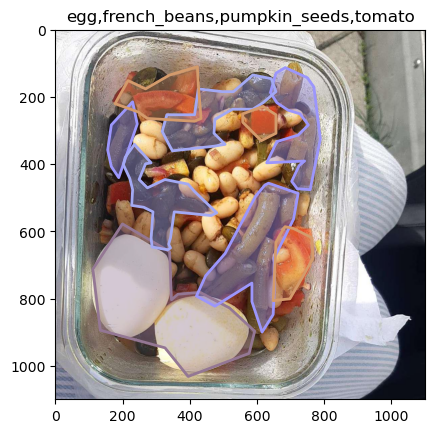

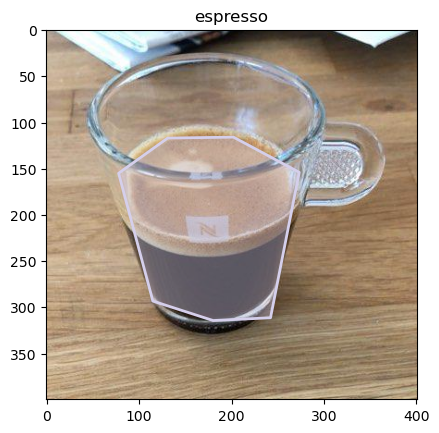

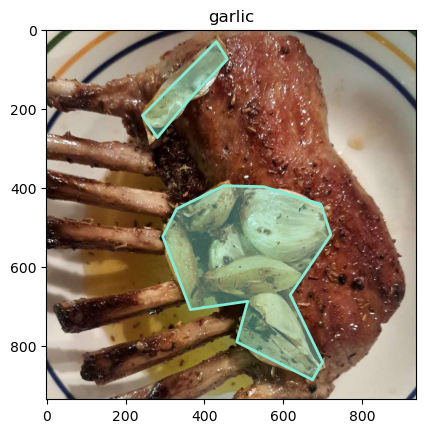

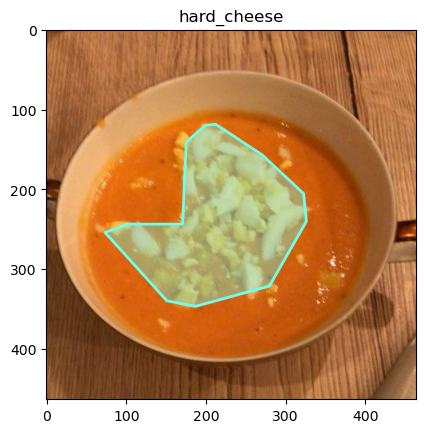

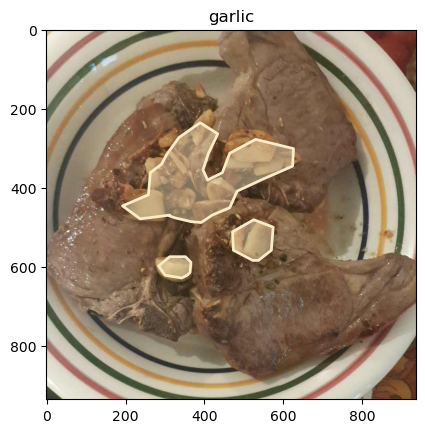

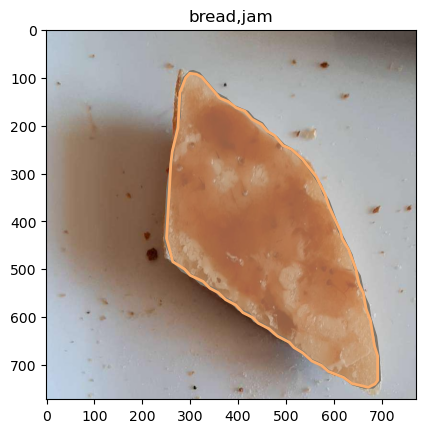

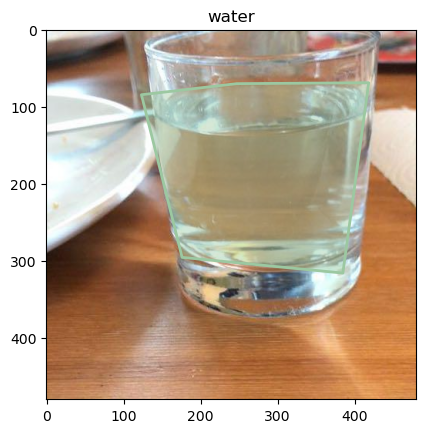

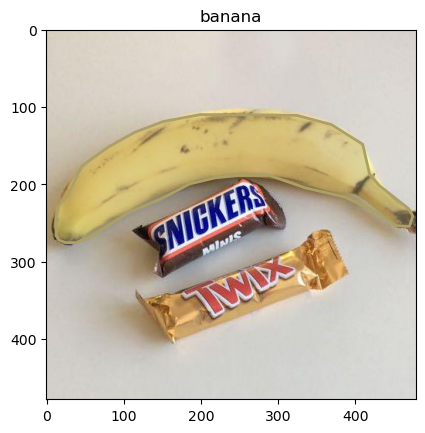

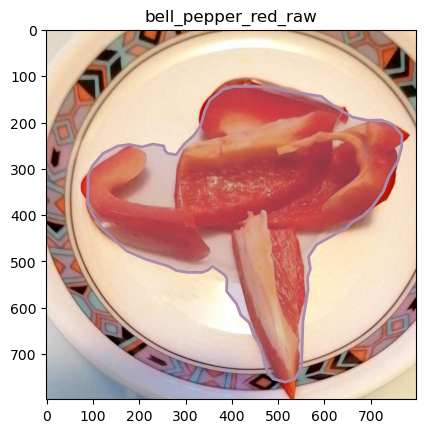

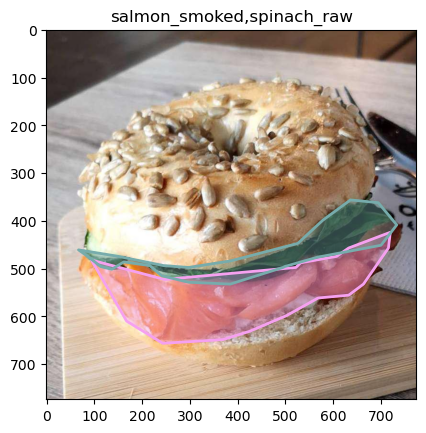

In [45]:
N = 10
image_ids = coco.getImgIds()
image_ids = np.random.choice(image_ids, size=10)
image_info_list = coco.loadImgs(image_ids)
cat_ids = coco.getCatIds()

for i in range(N):
    annot_ids = coco.getAnnIds(image_ids[i])
    annot_info_list = coco.loadAnns(annot_ids)
    cat_ids = list(map(lambda annot_info: annot_info["category_id"], annot_info_list))
    cats = coco.loadCats(cat_ids)

    image = plt.imread(os.path.join("/data/food_recognition/train/images/", image_info_list[i]["file_name"]))

    plt.imshow(image)
    plt.title(",".join(map(lambda cat: cat["name"], cats)))
    coco.showAnns(annot_info_list)
    plt.show()